In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
df = pd.read_csv('house_prices.csv')
df.head()

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
1,2,1Fam,9600,NaN,1976,2007,181500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000


<font color='red'>Assignment:</font> Create a new DataFrame "df_new" which contains only single family residences (hint: df.BldgType == '1Fam')

In [3]:
df_new=df[df.BldgType == '1Fam']

In [4]:
df_new.head()

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
1,2,1Fam,9600,NaN,1976,2007,181500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000


<font color='red'>Assignment:</font> How many rows are there in df_new and how many rows are there in df? How many rows did you remove?

In [5]:
len(df)

1460

In [6]:
len(df_new)

1220

In [7]:
print("Rows we removed are: " + str(len(df)-len(df_new)))

Rows we removed are: 240


In [8]:
sorted(list(df_new.YrSold.unique()))

[2006, 2007, 2008, 2009, 2010]

In [9]:
train_raw = df_new[df_new.YrSold < 2010].reset_index(drop=True)
test_raw = df_new[df_new.YrSold >= 2010].reset_index(drop=True)
print(len(test_raw), len(train_raw))

143 1077


<font color='red'>Assignment:</font> check if there are any missing values in train_raw and test_raw.

In [10]:
train_raw.isna().any().any()

True

In [11]:
test_raw.isna().any().any()

False

# Data Pre-processing

<font color='red'>Assignment:</font> Build a DataFrame named **train** which contains numerical values of **SalePrice** and **GrLivArea** in **train_raw**.

In [12]:
train=train_raw[['SalePrice','GrLivArea']]

**Example:** Generate features and target.

In [13]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X_train = train[features].copy()
y_train = train[target].copy()

**Example:** Imputing missing values in **X_train** using the column mean.

In [14]:
X_train = X_train.fillna(X_train.mean())

In [15]:
X_train.head()

,GrLivArea
0,1710.000000
1,1539.019473
2,1786.000000
3,1717.000000
4,2198.000000


<font color='red'>Assignment:</font> Get **X_test** and **y_test**.  

In [16]:
len(X_train)

1077

In [17]:
test=test_raw[['SalePrice','GrLivArea']]

In [18]:
X_test = test[features].copy()
y_test = test[target].copy()

In [19]:
X_test.head()

,GrLivArea
0,1004.0
1,1060.0
2,900.0
3,1704.0
4,1700.0


In [20]:
X_test = X_test.fillna(X_test.mean())

In [21]:
X_test.head()

,GrLivArea
0,1004.0
1,1060.0
2,900.0
3,1704.0
4,1700.0


In [22]:
y_test.head()

0    149000
1    154000
2    134800
3    306000
4    165500
Name: SalePrice, dtype: int64

<font color='red'>Question:</font> Why do we use mean from **X_train** rather than mean from **X_test**?

We cant use information from testing set while training data

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

**Example:** Initialize model

In [24]:
model = LinearRegression()

**Example:** Fit model

In [25]:
model.fit(X_train, y_train)

LinearRegression()

**Example:** Get prediction

In [26]:
y_train_pred = model.predict(X_train)

In [27]:
y_test_pred = model.predict(X_test)

<font color='red'>Assignment:</font> Calculate **train loss**: **MAE**, **MSE**, and **R2 score**.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [29]:
mean_absolute_error(y_train,y_train_pred)

41856.51240871165

In [30]:
mean_squared_error(y_train,y_train_pred)

3997917652.340051

In [31]:
r2_score(y_train,y_train_pred)

0.41333670988801463

<font color='red'>Assignment:</font> Visualize the difference between prediction and ground truth. Do you see any problem or anything unusual? Why? Hint: use plt.scatter()

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'True Values in $')

Text(0, 0.5, 'Predictions in $')

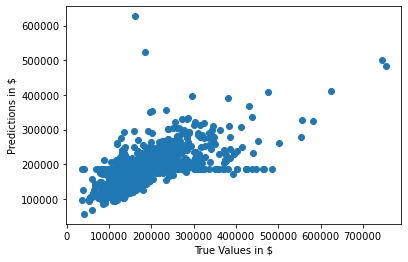

In [33]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('True Values in $')
plt.ylabel('Predictions in $')

The model predicts the same value of 200,000$ for houses that cost within range of 100000 to 500000

<font color='red'>Question:</font> What are the coefficient and intercept for this model?

In [34]:
model.intercept_

20386.368316967913

In [35]:
model.coef_

array([107.52757503])

**Example:** Visualize the relationship between **sale price** and **living area**.

In [36]:
import numpy as np

def myPlot(area, price, model):
    plt.scatter(area, price, alpha=0.3)
    x = np.linspace(0, area.max())
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color='r')
    plt.xlabel('Living area')
    plt.ylabel('Sale price')
    plt.show()

C:\Users\Uma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


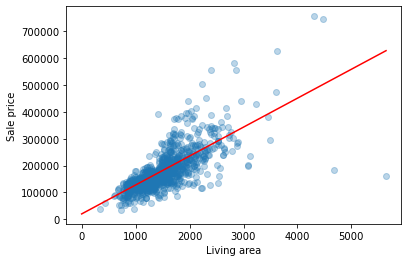

In [37]:
myPlot(train.GrLivArea, train.SalePrice, model)
#

<font color='red'>Assignment:</font> Calculate the **test loss**; visualize the comparision between prediction and ground truth, and the relationship between living area and sale price.

In [38]:
#hint: use model to predict price with test data first
y_test_pred= model.predict(X_test)

In [39]:
#Test Loss = Mean Squared Error
mean_squared_error(y_test,y_test_pred)
mean_absolute_error(y_test,y_test_pred)
r2_score(y_test,y_test_pred)

3050337337.9968753

36263.863131877064

0.5581474237567201

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

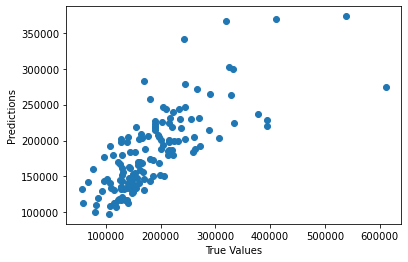

In [40]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

C:\Users\Uma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


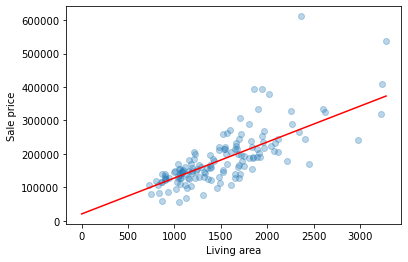

In [41]:
myPlot(test.GrLivArea, test.SalePrice, model)

# Polynomial Features

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pf = PolynomialFeatures(degree=3)

In [44]:
pf.fit_transform(X_train)

array([[1.00000000e+00, 1.71000000e+03, 2.92410000e+06, 5.00021100e+09],
       [1.00000000e+00, 1.53901947e+03, 2.36858094e+06, 3.64529219e+09],
       [1.00000000e+00, 1.78600000e+03, 3.18979600e+06, 5.69697566e+09],
       ...,
       [1.00000000e+00, 1.22100000e+03, 1.49084100e+06, 1.82031686e+09],
       [1.00000000e+00, 1.64700000e+03, 2.71260900e+06, 4.46766702e+09],
       [1.00000000e+00, 1.25600000e+03, 1.57753600e+06, 1.98138522e+09]])

In [45]:
pf.get_feature_names()

C:\Users\Uma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2', 'x0^3']

In [46]:
pd.DataFrame(pf.transform(X_train), 
             columns=pf.get_feature_names()).head()

C:\Users\Uma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,x0,x0^2,x0^3
0,1.0,1710.000000,2.924100e+06,5.000211e+09
1,1.0,1539.019473,2.368581e+06,3.645292e+09
2,1.0,1786.000000,3.189796e+06,5.696976e+09
3,1.0,1717.000000,2.948089e+06,5.061869e+09
4,1.0,2198.000000,4.831204e+06,1.061899e+10


<font color='red'>Question:</font> What is each column in above dataframe?

Each column in above dataframe is feature created by raising existing feature to an exponent.

## Pipeline

**Example:** use of **pipeline**.

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('lr', LinearRegression())]
model = Pipeline(steps)

**Example:** use pipeline as model.

In [49]:
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [50]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

<font color='red'>Assignment:</font> Calculate regression metrics; visualize both **train** and **cost** loss; visualize relationship between **living area** and **sale price**.

In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [52]:
mean_absolute_error(y_test,y_test_pred)
mean_squared_error(y_test,y_test_pred)
r2_score(y_test,y_test_pred)

37418.40989734562

3074548322.133351

0.5546403737066059

<font color='red'>  visualize both train and cost loss

In [53]:
#According to my understanding, train loss means taking mean squared error from training data set whereas cost loss means the same thing but from test data set.

C:\Users\Uma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


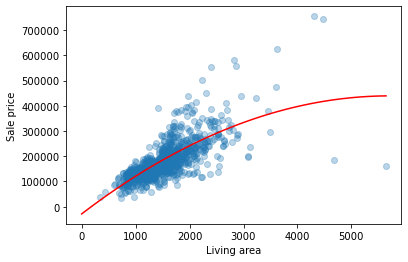

In [54]:
myPlot(train.GrLivArea, train.SalePrice, model)

<font color='red'>Question:</font> Does the model with polynomial features perform better? Why?

Yes, it performs better since we see it has better values of R2 and MAE. This happens because polynomial regression is better at depicting non linear relationships

**Example:** Extract the linear model from pipeline

In [55]:
lr = model.steps[1][1]

**Example:** Extract the coefficents

In [56]:
lr.coef_

array([ 0.00000000e+00,  1.63784703e+02, -1.43272371e-02])

<font color='red'>Question:</font> Why is the coefficient for x^2 so small?

Since  x^2 is very big number, its coefficient will be smaller to balance. And therefore we will introduce scaling to solve this problem. 

## Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('Rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model = Pipeline(steps)

In [59]:
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('Rescale', MinMaxScaler()),
                ('lr', LinearRegression())])

In [60]:
model.steps[2][1].coef_

array([      0.        ,  869369.20419295, -454468.67062754])

<font color='red'>Question:</font> What does **MinMaxScaler** do? Why do we need it?

The code is scaling the independent variables so that they lie in the range of 0 and 1. This is important because few variable values might be in thousands and few might be in small ranges. 

easier to compare coeff to determine which one is imp

## High degree polynomial terms

<font color='red'>Assignment:</font> Repeat above steps with higher **degree** values in **PolynomialFeatures**. Hint: you can write a for loop to loop through degree 1 to 50, and record the MAE of train and test in mae_train and mae_test.

In [61]:
mae_train={}
mae_test={}
for i in range(1,50):
    steps = [('poly', PolynomialFeatures(degree=i)),('Rescale', MinMaxScaler()),('lr', LinearRegression())]
    # add your code here
    model = Pipeline(steps)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    mae_train[i] = mean_absolute_error(y_train,y_train_pred)
    y_test_pred = model.predict(X_test)
    mae_test[i] = mean_absolute_error(y_test,y_test_pred)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures()), ('Rescale', MinMaxScaler()),
                ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=6)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=7)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=9)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=11)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=12)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=13)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=14)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=15)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=16)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=17)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=18)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=19)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=21)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=22)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=23)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=24)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=25)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=26)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=27)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=28)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=29)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=30)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=31)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=32)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=33)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=34)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=35)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=36)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=37)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=38)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=39)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=40)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=41)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=42)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=43)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=44)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=45)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=46)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=47)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=48)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('poly', PolynomialFeatures(degree=49)),
                ('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

In [62]:
mae_test

{1: 36263.863131877064,
 2: 37418.409897348545,
 3: 36613.384404459255,
 4: 36515.63832071274,
 5: 36790.56553457743,
 6: 36856.87651150783,
 7: 37070.60388774031,
 8: 37008.731828056305,
 9: 37062.293297423246,
 10: 36950.97128942065,
 11: 36916.112486820915,
 12: 36918.414784185785,
 13: 36800.77212334517,
 14: 37262.43072497057,
 15: 37791.24200430733,
 16: 37673.35676548472,
 17: 37924.00931542015,
 18: 38067.99337389698,
 19: 37751.5328250409,
 20: 36957.76003616957,
 21: 36731.41659411968,
 22: 36572.050221524376,
 23: 35923.27364563721,
 24: 36141.85273473021,
 25: 36281.745672328776,
 26: 36308.62363459117,
 27: 36309.79138819433,
 28: 36383.63584682103,
 29: 37501.32611653458,
 30: 36268.72623970395,
 31: 36271.094035901595,
 32: 36311.61583041415,
 33: 37751.373343065134,
 34: 37620.83574566069,
 35: 36337.13907518019,
 36: 36199.52546894733,
 37: 35704.108743827026,
 38: 35489.49530227647,
 39: 35498.729262102985,
 40: 35552.284622270156,
 41: 35550.255752214434,
 42: 35352.

<font color='red'>Assignment:</font> Visualize the change of train loss and test loss with polynomial degree value, respectively. Use **MAE**.

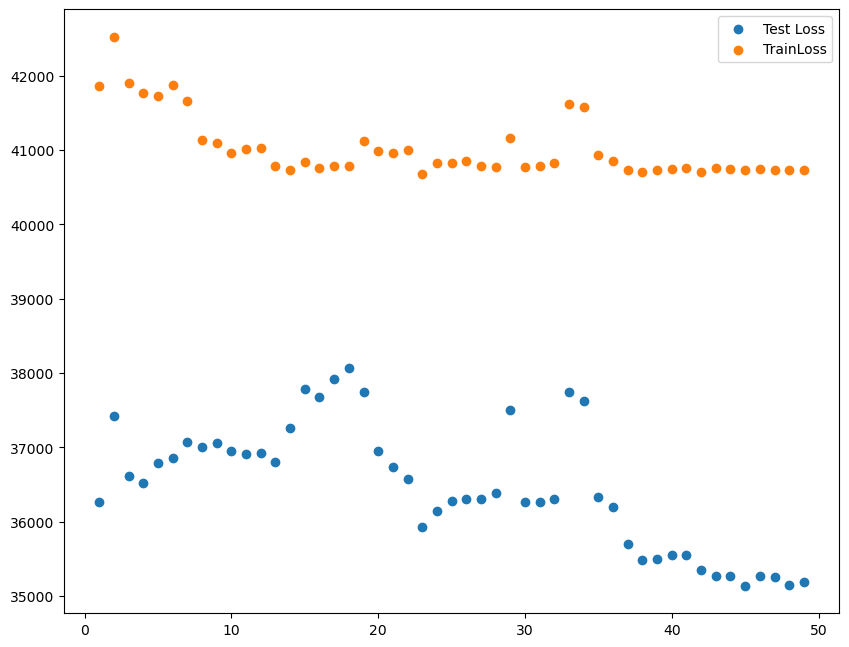

In [63]:
x=list(mae_test.keys())
y1= list(mae_test.values()) 
y2=list(mae_train.values())


# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'Test Loss')
plt.scatter(x, y2, label=f'TrainLoss')

# Plot

plt.legend()
plt.show()